### 1) Importando Bibliotecas

In [ ]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from pyswip import Prolog

### 2) Lendo o arquivo com as informações das disciplinas

In [ ]:
# Ler a grade curricular em um arquivo excel
df = pd.read_excel('Grade.xlsx', sheet_name='Ainda mais Novo')

In [ ]:
# Analisando as colunas do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Semestre                     27 non-null     int64  
 1   Código Disciplina            27 non-null     object 
 2   Nome                         27 non-null     object 
 3   Créd. Aula                   27 non-null     int64  
 4   Créd. Trab.                  27 non-null     int64  
 5   Créditos Totais              27 non-null     int64  
 6   Pontuação                    27 non-null     int64  
 7   CH                           27 non-null     int64  
 8   Código Disciplina Requisito  13 non-null     object 
 9   Disciplina Requisito         13 non-null     object 
 10  Unnamed: 10                  0 non-null      float64
 11  Semestre.1                   3 non-null      float64
 12  Total Créditos               3 non-null      float64
dtypes: float64(3), int64(6

In [ ]:
# Seleciona apenas as colunas válidas
df = df[df.columns[:10]]

In [ ]:
# Converting the object type columns into string (because there might be conflict with numerical values)
# Converter as células para string (evitar conflito de formatos diferentes entre tabelas)
df['Código Disciplina'] = df['Código Disciplina'].astype('str')
df['Nome'] = df['Nome'].astype('str')
df['Código Disciplina Requisito'] = df['Código Disciplina Requisito'].astype('str')
df['Disciplina Requisito'] = df['Disciplina Requisito'].astype('str')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Semestre                     27 non-null     int64 
 1   Código Disciplina            27 non-null     object
 2   Nome                         27 non-null     object
 3   Créd. Aula                   27 non-null     int64 
 4   Créd. Trab.                  27 non-null     int64 
 5   Créditos Totais              27 non-null     int64 
 6   Pontuação                    27 non-null     int64 
 7   CH                           27 non-null     int64 
 8   Código Disciplina Requisito  27 non-null     object
 9   Disciplina Requisito         27 non-null     object
dtypes: int64(6), object(4)
memory usage: 2.2+ KB


In [ ]:
# Observar a tabela
df

Semestre Código Disciplina  \
0          1           4323101   
1          1           MAC2166   
2          1           MAT2453   
3          1           MAT3457   
4          1           PCC3100   
5          1           PMR3100   
6          1           PMT3100   
7          1           PMT3131   
8          2           4323102   
9          2           4323102   
10         2           MAT2454   
11         2           MAT3458   
12         2           PME3100   
13         2           PME3100   
14         2           PMR3101   
15         2           PMT3200   
16         2           PRO3820   
17         3           0303200   
18         3           4323201   
19         3           4323203   
20         3           4323203   
21         3           MAT2455   
22         3           MAT2455   
23         3           PHA3001   
24         3           PME3200   
25         3           PMR3201   
26         3           PMR3202   

                                                 Nome  Créd. Aula  \
0                                            Física I           3   
1                             Introdução à Computação           4   
2                    Cálculo Diferencial e Integral I           6   
3                                    Álgebra Linear I           4   
4                  Representação Gráfica para Projeto           3   
5                 Introdução a Engenharia Mecatrônica           4   
6   Fundamentos de Ciência e Engenharia dos Materiais           2   
7   Química dos Materiais Aplicada à Engenharia El...           2   
8                                           Física II           2   
9                                           Física II           2   
10                  Cálculo Diferencial e Integral II           4   
11                                  Álgebra Linear II           4   
12                                         Mecânica I           6   
13                                         Mecânica I           6   
14                   Introdução à Manufatura Mecânica           4   
15                              Ciência dos Materiais           4   
16                              Introdução à Economia           4   
17                                      Probabilidade           2   
18                              Física Experimental A           2   
19                                         Física III           4   
20                                         Física III           4   
21                 Cálculo Diferencial e Integral III           4   
22                 Cálculo Diferencial e Integral III           4   
23                         Engenharia e Meio Ambiente           2   
24                                        Mecânica II           4   
25                          Computação para Automação           4   
26        Introdução ao Projeto de Sistemas Mecânicos           5   

    Créd. Trab.  Créditos Totais  Pontuação  CH Código Disciplina Requisito  \
0             0                3         10  45                         nan   
1             0                4          8  60                         nan   
2             0                6         14  90                         nan   
3             0                4         10  60                         nan   
4             1                4          5  75                         nan   
5             0                4          4  60                         nan   
6             0                2          6  30                         nan   
7             0                2          4  30                         nan   
8             0                2          8  30                     4323101   
9             0                2          8  30                     MAT2453   
10            0                4         10  60                     MAT2453   
11            0                4          7  60                     MAT3457   
12            0                6          8  90                     MAT2453   
13          

### 3) Criar uma tabela dimensão para as disciplinas

In [ ]:
disciplinas_df = df[['Semestre', 'Código Disciplina', 'Nome', 'Créditos Totais', 'Pontuação', 'CH']].drop_duplicates()
disciplinas_df

Semestre Código Disciplina  \
0          1           4323101   
1          1           MAC2166   
2          1           MAT2453   
3          1           MAT3457   
4          1           PCC3100   
5          1           PMR3100   
6          1           PMT3100   
7          1           PMT3131   
8          2           4323102   
10         2           MAT2454   
11         2           MAT3458   
12         2           PME3100   
14         2           PMR3101   
15         2           PMT3200   
16         2           PRO3820   
17         3           0303200   
18         3           4323201   
19         3           4323203   
21         3           MAT2455   
23         3           PHA3001   
24         3           PME3200   
25         3           PMR3201   
26         3           PMR3202   

                                                 Nome  Créditos Totais  \
0                                            Física I                3   
1                             Introdução à Computação                4   
2                    Cálculo Diferencial e Integral I                6   
3                                    Álgebra Linear I                4   
4                  Representação Gráfica para Projeto                4   
5                 Introdução a Engenharia Mecatrônica                4   
6   Fundamentos de Ciência e Engenharia dos Materiais                2   
7   Química dos Materiais Aplicada à Engenharia El...                2   
8                                           Física II                2   
10                  Cálculo Diferencial e Integral II                4   
11                                  Álgebra Linear II                4   
12                                         Mecânica I                6   
14                   Introdução à Manufatura Mecânica                4   
15                              Ciência dos Materiais                4   
16                              Introdução à Economia                4   
17                                      Probabilidade                2   
18                              Física Experimental A                2   
19                                         Física III                4   
21                 Cálculo Diferencial e Integral III                4   
23                         Engenharia e Meio Ambiente                2   
24                                        Mecânica II                4   
25                          Computação para Automação                4   
26        Introdução ao Projeto de Sistemas Mecânicos                5   

    Pontuação  CH  
0          10  45  
1           8  60  
2          14  90  
3          10  60  
4           5  75  
5           4  60  
6           6  30  
7           4  30  
8           8  30  
10         10  60  
11          7  60  
12          8  90  
14          3  60  
15          4  60  
16          3  60  
17          6  30  
18          4  30  
19          8  60  
21          6  60  
23          2  30  
24          4  60  
25          3  60  
26          4  75

In [ ]:
# Resetar os índices para iniciar com o valor 1
disciplinas_df.reset_index(drop=True, inplace=True)
disciplinas_df['ID'] = disciplinas_df.index + 1

# Reordenar as colunas para o índice ser a primeira coluna
disciplinas_df = disciplinas_df[['ID'] + [col for col in disciplinas_df if col != 'ID']]
disciplinas_df

ID  Semestre Código Disciplina  \
0    1         1           4323101   
1    2         1           MAC2166   
2    3         1           MAT2453   
3    4         1           MAT3457   
4    5         1           PCC3100   
5    6         1           PMR3100   
6    7         1           PMT3100   
7    8         1           PMT3131   
8    9         2           4323102   
9   10         2           MAT2454   
10  11         2           MAT3458   
11  12         2           PME3100   
12  13         2           PMR3101   
13  14         2           PMT3200   
14  15         2           PRO3820   
15  16         3           0303200   
16  17         3           4323201   
17  18         3           4323203   
18  19         3           MAT2455   
19  20         3           PHA3001   
20  21         3           PME3200   
21  22         3           PMR3201   
22  23         3           PMR3202   

                                                 Nome  Créditos Totais  \
0                                            Física I                3   
1                             Introdução à Computação                4   
2                    Cálculo Diferencial e Integral I                6   
3                                    Álgebra Linear I                4   
4                  Representação Gráfica para Projeto                4   
5                 Introdução a Engenharia Mecatrônica                4   
6   Fundamentos de Ciência e Engenharia dos Materiais                2   
7   Química dos Materiais Aplicada à Engenharia El...                2   
8                                           Física II                2   
9                   Cálculo Diferencial e Integral II                4   
10                                  Álgebra Linear II                4   
11                                         Mecânica I                6   
12                   Introdução à Manufatura Mecânica                4   
13                              Ciência dos Materiais                4   
14                              Introdução à Economia                4   
15                                      Probabilidade                2   
16                              Física Experimental A                2   
17                                         Física III                4   
18                 Cálculo Diferencial e Integral III                4   
19                         Engenharia e Meio Ambiente                2   
20                                        Mecânica II                4   
21                          Computação para Automação                4   
22        Introdução ao Projeto de Sistemas Mecânicos                5   

    Pontuação  CH  
0          10  45  
1           8  60  
2          14  90  
3          10  60  
4           5  75  
5           4  60  
6           6  30  
7           4  30  
8           8  30  
9          10  60  
10          7  60  
11          8  90  
12          3  60  
13          4  60  
14          3  60  
15          6  30  
16          4  30  
17          8  60  
18          6  60  
19          2  30  
20          4  60  
21          3  60  
22          4  75

In [ ]:
# Criar um dicionário para os nomes das disciplinas
subject_name_mapping = disciplinas_df.set_index('ID')['Nome'].to_dict()
subject_name_mapping

{1: 'Física I',
 2: 'Introdução à Computação',
 3: 'Cálculo Diferencial e Integral I',
 4: 'Álgebra Linear I',
 5: 'Representação Gráfica para Projeto',
 6: 'Introdução a Engenharia Mecatrônica',
 7: 'Fundamentos de Ciência e Engenharia dos Materiais',
 8: 'Química dos Materiais Aplicada à Engenharia Elétrica',
 9: 'Física II',
 10: 'Cálculo Diferencial e Integral II',
 11: 'Álgebra Linear II',
 12: 'Mecânica I',
 13: 'Introdução à Manufatura Mecânica',
 14: 'Ciência dos Materiais',
 15: 'Introdução à Economia',
 16: 'Probabilidade',
 17: 'Física Experimental A',
 18: 'Física III',
 19: 'Cálculo Diferencial e Integral III',
 20: 'Engenharia e Meio Ambiente',
 21: 'Mecânica II',
 22: 'Computação para Automação',
 23: 'Introdução ao Projeto de Sistemas Mecânicos'}

In [ ]:
# Criar um dicionário para os semestres das disciplinas
semester_mapping = disciplinas_df.set_index('ID')['Semestre'].to_dict()
semester_mapping

{1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 2,
 10: 2,
 11: 2,
 12: 2,
 13: 2,
 14: 2,
 15: 2,
 16: 3,
 17: 3,
 18: 3,
 19: 3,
 20: 3,
 21: 3,
 22: 3,
 23: 3}

In [ ]:
# Criar um dicionário para os créditos das disciplinas
subject_credits_mapping = disciplinas_df.set_index('ID')['Créditos Totais'].to_dict()
subject_credits_mapping


{1: 3,
 2: 4,
 3: 6,
 4: 4,
 5: 4,
 6: 4,
 7: 2,
 8: 2,
 9: 2,
 10: 4,
 11: 4,
 12: 6,
 13: 4,
 14: 4,
 15: 4,
 16: 2,
 17: 2,
 18: 4,
 19: 4,
 20: 2,
 21: 4,
 22: 4,
 23: 5}

In [ ]:
# Criar um dicionário para as notas das disciplinas
subject_score_mapping = disciplinas_df.set_index('ID')['Pontuação'].to_dict()
subject_score_mapping

{1: 10,
 2: 8,
 3: 14,
 4: 10,
 5: 5,
 6: 4,
 7: 6,
 8: 4,
 9: 8,
 10: 10,
 11: 7,
 12: 8,
 13: 3,
 14: 4,
 15: 3,
 16: 6,
 17: 4,
 18: 8,
 19: 6,
 20: 2,
 21: 4,
 22: 3,
 23: 4}

#### 3.1) Função que lê o índice e devolve o nome da disciplina

In [ ]:
# Função para obter nome da disciplina a partir do índice
def get_subject_from_id(id):
    subject_name = disciplinas_df[
        disciplinas_df['ID'] == id
    ]['Nome'].unique()[0]

    return subject_name

In [ ]:
# Testando a função
for i in range(1,len(disciplinas_df['ID'].unique())+1):
    print(get_subject_from_id(i))

Física I
Introdução à Computação
Cálculo Diferencial e Integral I
Álgebra Linear I
Representação Gráfica para Projeto
Introdução a Engenharia Mecatrônica
Fundamentos de Ciência e Engenharia dos Materiais
Química dos Materiais Aplicada à Engenharia Elétrica
Física II
Cálculo Diferencial e Integral II
Álgebra Linear II
Mecânica I
Introdução à Manufatura Mecânica
Ciência dos Materiais
Introdução à Economia
Probabilidade
Física Experimental A
Física III
Cálculo Diferencial e Integral III
Engenharia e Meio Ambiente
Mecânica II
Computação para Automação
Introdução ao Projeto de Sistemas Mecânicos


### 4) Criar uma tabela fato para as disciplinas requeridas

In [ ]:
# Remover duplicadas
requisitos_df = df[
    ['Semestre', 'Código Disciplina', 'Nome', 'Código Disciplina Requisito', 'Disciplina Requisito']
    ].drop_duplicates()

# Substituir 'nan' com NaN
requisitos_df.replace('nan', np.nan, inplace=True)

# Remover células vazias
requisitos_df.dropna(inplace=True)
requisitos_df

Semestre Código Disciplina                                Nome  \
8          2           4323102                           Física II   
9          2           4323102                           Física II   
10         2           MAT2454   Cálculo Diferencial e Integral II   
11         2           MAT3458                   Álgebra Linear II   
12         2           PME3100                          Mecânica I   
13         2           PME3100                          Mecânica I   
15         2           PMT3200               Ciência dos Materiais   
17         3           0303200                       Probabilidade   
18         3           4323201               Física Experimental A   
19         3           4323203                          Física III   
20         3           4323203                          Física III   
21         3           MAT2455  Cálculo Diferencial e Integral III   
22         3           MAT2455  Cálculo Diferencial e Integral III   

   Código Disciplina Requisito  \
8                      4323101   
9                      MAT2453   
10                     MAT2453   
11                     MAT3457   
12                     MAT2453   
13                     MAT3457   
15                     PMT3100   
17                     MAT2453   
18                     4323101   
19                     4323102   
20                     MAT2454   
21                     MAT2454   
22                     MAT3458   

                                 Disciplina Requisito  
8                                            Física I  
9                    Cálculo Diferencial e Integral I  
10                   Cálculo Diferencial e Integral I  
11                                   Álgebra Linear I  
12                   Cálculo Diferencial e Integral I  
13                                   Álgebra Linear I  
15  Fundamentos de Ciência e Engenharia dos Materiais  
17                   Cálculo Diferencial e Integral I  
18                                           Física I  
19                                          Física II  
20                  Cálculo Diferencial e Integral II  
21                  Cálculo Diferencial e Integral II  
22                                  Álgebra Linear II

In [ ]:
# Obter o índice das disciplinas requisitantes
requisitos_df = requisitos_df.merge(
    disciplinas_df[['ID', 'Semestre', 'Código Disciplina', 'Nome']],
    on = ['Semestre', 'Código Disciplina', 'Nome'],
    how = 'left'
)

requisitos_df

Semestre Código Disciplina                                Nome  \
0          2           4323102                           Física II   
1          2           4323102                           Física II   
2          2           MAT2454   Cálculo Diferencial e Integral II   
3          2           MAT3458                   Álgebra Linear II   
4          2           PME3100                          Mecânica I   
5          2           PME3100                          Mecânica I   
6          2           PMT3200               Ciência dos Materiais   
7          3           0303200                       Probabilidade   
8          3           4323201               Física Experimental A   
9          3           4323203                          Física III   
10         3           4323203                          Física III   
11         3           MAT2455  Cálculo Diferencial e Integral III   
12         3           MAT2455  Cálculo Diferencial e Integral III   

   Código Disciplina Requisito  \
0                      4323101   
1                      MAT2453   
2                      MAT2453   
3                      MAT3457   
4                      MAT2453   
5                      MAT3457   
6                      PMT3100   
7                      MAT2453   
8                      4323101   
9                      4323102   
10                     MAT2454   
11                     MAT2454   
12                     MAT3458   

                                 Disciplina Requisito  ID  
0                                            Física I   9  
1                    Cálculo Diferencial e Integral I   9  
2                    Cálculo Diferencial e Integral I  10  
3                                    Álgebra Linear I  11  
4                    Cálculo Diferencial e Integral I  12  
5                                    Álgebra Linear I  12  
6   Fundamentos de Ciência e Engenharia dos Materiais  14  
7                    Cálculo Diferencial e Integral I  16  
8                                            Física I  17  
9                                           Física II  18  
10                  Cálculo Diferencial e Integral II  18  
11                  Cálculo Diferencial e Integral II  19  
12                                  Álgebra Linear II  19

In [ ]:
# Renomear as colunas para poder realizar o merge com as disciplinas requisitadas
requisitos_df = requisitos_df.rename(columns={
    'ID' : 'ID Disciplina',
    'Código Disciplina' : 'Código Requisitante',
    'Nome' : 'Disciplina Requisitante',
    'Código Disciplina Requisito' : 'Código Disciplina',
    'Disciplina Requisito' : 'Nome'
})

requisitos_df

Semestre Código Requisitante             Disciplina Requisitante  \
0          2             4323102                           Física II   
1          2             4323102                           Física II   
2          2             MAT2454   Cálculo Diferencial e Integral II   
3          2             MAT3458                   Álgebra Linear II   
4          2             PME3100                          Mecânica I   
5          2             PME3100                          Mecânica I   
6          2             PMT3200               Ciência dos Materiais   
7          3             0303200                       Probabilidade   
8          3             4323201               Física Experimental A   
9          3             4323203                          Física III   
10         3             4323203                          Física III   
11         3             MAT2455  Cálculo Diferencial e Integral III   
12         3             MAT2455  Cálculo Diferencial e Integral III   

   Código Disciplina                                               Nome  \
0            4323101                                           Física I   
1            MAT2453                   Cálculo Diferencial e Integral I   
2            MAT2453                   Cálculo Diferencial e Integral I   
3            MAT3457                                   Álgebra Linear I   
4            MAT2453                   Cálculo Diferencial e Integral I   
5            MAT3457                                   Álgebra Linear I   
6            PMT3100  Fundamentos de Ciência e Engenharia dos Materiais   
7            MAT2453                   Cálculo Diferencial e Integral I   
8            4323101                                           Física I   
9            4323102                                          Física II   
10           MAT2454                  Cálculo Diferencial e Integral II   
11           MAT2454                  Cálculo Diferencial e Integral II   
12           MAT3458                                  Álgebra Linear II   

    ID Disciplina  
0               9  
1               9  
2              10  
3              11  
4              12  
5              12  
6              14  
7              16  
8              17  
9              18  
10             18  
11             19  
12             19

In [ ]:
# Obter o índice das disciplinas requisitadas
requisitos_df = requisitos_df.merge(
    disciplinas_df[['ID', 'Código Disciplina', 'Nome']],
    on = ['Código Disciplina', 'Nome'],
    how = 'left'
)

requisitos_df

Semestre Código Requisitante             Disciplina Requisitante  \
0          2             4323102                           Física II   
1          2             4323102                           Física II   
2          2             MAT2454   Cálculo Diferencial e Integral II   
3          2             MAT3458                   Álgebra Linear II   
4          2             PME3100                          Mecânica I   
5          2             PME3100                          Mecânica I   
6          2             PMT3200               Ciência dos Materiais   
7          3             0303200                       Probabilidade   
8          3             4323201               Física Experimental A   
9          3             4323203                          Física III   
10         3             4323203                          Física III   
11         3             MAT2455  Cálculo Diferencial e Integral III   
12         3             MAT2455  Cálculo Diferencial e Integral III   

   Código Disciplina                                               Nome  \
0            4323101                                           Física I   
1            MAT2453                   Cálculo Diferencial e Integral I   
2            MAT2453                   Cálculo Diferencial e Integral I   
3            MAT3457                                   Álgebra Linear I   
4            MAT2453                   Cálculo Diferencial e Integral I   
5            MAT3457                                   Álgebra Linear I   
6            PMT3100  Fundamentos de Ciência e Engenharia dos Materiais   
7            MAT2453                   Cálculo Diferencial e Integral I   
8            4323101                                           Física I   
9            4323102                                          Física II   
10           MAT2454                  Cálculo Diferencial e Integral II   
11           MAT2454                  Cálculo Diferencial e Integral II   
12           MAT3458                                  Álgebra Linear II   

    ID Disciplina  ID  
0               9   1  
1               9   3  
2              10   3  
3              11   4  
4              12   3  
5              12   4  
6              14   7  
7              16   3  
8              17   1  
9              18   9  
10             18  10  
11             19  10  
12             19  11

In [ ]:
# Renomeando as colunas
requisitos_df = requisitos_df.rename(columns={
    'ID Disciplina' : 'ID Requisitante',
    'ID' : 'ID Requisitada',
    'Código Disciplina' : 'Código Requisitada',
    'Nome' : 'Disciplina Requisitada'
})

requisitos_df

Semestre Código Requisitante             Disciplina Requisitante  \
0          2             4323102                           Física II   
1          2             4323102                           Física II   
2          2             MAT2454   Cálculo Diferencial e Integral II   
3          2             MAT3458                   Álgebra Linear II   
4          2             PME3100                          Mecânica I   
5          2             PME3100                          Mecânica I   
6          2             PMT3200               Ciência dos Materiais   
7          3             0303200                       Probabilidade   
8          3             4323201               Física Experimental A   
9          3             4323203                          Física III   
10         3             4323203                          Física III   
11         3             MAT2455  Cálculo Diferencial e Integral III   
12         3             MAT2455  Cálculo Diferencial e Integral III   

   Código Requisitada                             Disciplina Requisitada  \
0             4323101                                           Física I   
1             MAT2453                   Cálculo Diferencial e Integral I   
2             MAT2453                   Cálculo Diferencial e Integral I   
3             MAT3457                                   Álgebra Linear I   
4             MAT2453                   Cálculo Diferencial e Integral I   
5             MAT3457                                   Álgebra Linear I   
6             PMT3100  Fundamentos de Ciência e Engenharia dos Materiais   
7             MAT2453                   Cálculo Diferencial e Integral I   
8             4323101                                           Física I   
9             4323102                                          Física II   
10            MAT2454                  Cálculo Diferencial e Integral II   
11            MAT2454                  Cálculo Diferencial e Integral II   
12            MAT3458                                  Álgebra Linear II   

    ID Requisitante  ID Requisitada  
0                 9               1  
1                 9               3  
2                10               3  
3                11               4  
4                12               3  
5                12               4  
6                14               7  
7                16               3  
8                17               1  
9                18               9  
10               18              10  
11               19              10  
12               19              11

In [ ]:
# Reordenar as colunas para os índices serem as primeiras
requisitos_df = requisitos_df[['ID Requisitada'] + [col for col in requisitos_df if col != 'ID Requisitada']]
requisitos_df = requisitos_df[['ID Requisitante'] + [col for col in requisitos_df if col != 'ID Requisitante']]

requisitos_df

ID Requisitante  ID Requisitada  Semestre Código Requisitante  \
0                 9               1         2             4323102   
1                 9               3         2             4323102   
2                10               3         2             MAT2454   
3                11               4         2             MAT3458   
4                12               3         2             PME3100   
5                12               4         2             PME3100   
6                14               7         2             PMT3200   
7                16               3         3             0303200   
8                17               1         3             4323201   
9                18               9         3             4323203   
10               18              10         3             4323203   
11               19              10         3             MAT2455   
12               19              11         3             MAT2455   

               Disciplina Requisitante Código Requisitada  \
0                            Física II            4323101   
1                            Física II            MAT2453   
2    Cálculo Diferencial e Integral II            MAT2453   
3                    Álgebra Linear II            MAT3457   
4                           Mecânica I            MAT2453   
5                           Mecânica I            MAT3457   
6                Ciência dos Materiais            PMT3100   
7                        Probabilidade            MAT2453   
8                Física Experimental A            4323101   
9                           Física III            4323102   
10                          Física III            MAT2454   
11  Cálculo Diferencial e Integral III            MAT2454   
12  Cálculo Diferencial e Integral III            MAT3458   

                               Disciplina Requisitada  
0                                            Física I  
1                    Cálculo Diferencial e Integral I  
2                    Cálculo Diferencial e Integral I  
3                                    Álgebra Linear I  
4                    Cálculo Diferencial e Integral I  
5                                    Álgebra Linear I  
6   Fundamentos de Ciência e Engenharia dos Materiais  
7                    Cálculo Diferencial e Integral I  
8                                            Física I  
9                                           Física II  
10                  Cálculo Diferencial e Integral II  
11                  Cálculo Diferencial e Integral II  
12                                  Álgebra Linear II

In [ ]:
# Função para completar a árvore de requisitos
def generate_transitive_prerequisites(df_current):
    new_prerequisites = []
    for _, row in df_current.iterrows():
        subject_a = row['Código Requisitante']
        subject_b = row['Código Requisitada']

        for _, inner_row in df_current.iterrows():
            if inner_row['Código Requisitante'] == subject_b:
                new_prerequisite = {
                    'ID Requisitante': row['ID Requisitante'],
                    'ID Requisitada': inner_row['ID Requisitada'],
                    'Semestre': inner_row['Semestre'],
                    'Código Requisitante': subject_a,
                    'Disciplina Requisitante': row['Disciplina Requisitante'],
                    'Código Requisitada': inner_row['Código Requisitada'],
                    'Disciplina Requisitada': inner_row['Disciplina Requisitada'],
                }
                new_prerequisites.append(new_prerequisite)

    return pd.DataFrame(new_prerequisites)

# Gerar os novos pré requisitos
additional_prerequisites_df = generate_transitive_prerequisites(requisitos_df)


In [ ]:
# Adicionar os novos pré requisitos
final_prerequisites_df = pd.concat([requisitos_df, additional_prerequisites_df], ignore_index=True)
final_prerequisites_df.drop_duplicates(inplace=True)


In [ ]:
final_prerequisites_df

ID Requisitante  ID Requisitada  Semestre Código Requisitante  \
0                 9               1         2             4323102   
1                 9               3         2             4323102   
2                10               3         2             MAT2454   
3                11               4         2             MAT3458   
4                12               3         2             PME3100   
5                12               4         2             PME3100   
6                14               7         2             PMT3200   
7                16               3         3             0303200   
8                17               1         3             4323201   
9                18               9         3             4323203   
10               18              10         3             4323203   
11               19              10         3             MAT2455   
12               19              11         3             MAT2455   
13               18               1         2             4323203   
14               18               3         2             4323203   
16               19               3         2             MAT2455   
17               19               4         2             MAT2455   

               Disciplina Requisitante Código Requisitada  \
0                            Física II            4323101   
1                            Física II            MAT2453   
2    Cálculo Diferencial e Integral II            MAT2453   
3                    Álgebra Linear II            MAT3457   
4                           Mecânica I            MAT2453   
5                           Mecânica I            MAT3457   
6                Ciência dos Materiais            PMT3100   
7                        Probabilidade            MAT2453   
8                Física Experimental A            4323101   
9                           Física III            4323102   
10                          Física III            MAT2454   
11  Cálculo Diferencial e Integral III            MAT2454   
12  Cálculo Diferencial e Integral III            MAT3458   
13                          Física III            4323101   
14                          Física III            MAT2453   
16  Cálculo Diferencial e Integral III            MAT2453   
17  Cálculo Diferencial e Integral III            MAT3457   

                               Disciplina Requisitada  
0                                            Física I  
1                    Cálculo Diferencial e Integral I  
2                    Cálculo Diferencial e Integral I  
3                                    Álgebra Linear I  
4                    Cálculo Diferencial e Integral I  
5                                    Álgebra Linear I  
6   Fundamentos de Ciência e Engenharia dos Materiais  
7                    Cálculo Diferencial e Integral I  
8                                            Física I  
9                                           Física II  
10                  Cálculo Diferencial e Integral II  
11                  Cálculo Diferencial e Integral II  
12                                  Álgebra Linear II  
13                                           Física I  
14                   Cálculo Diferencial e Integral I  
16                   Cálculo Diferencial e Integral I  
17                                   Álgebra Linear I

### 5) Criar uma tabela fato reduzida apenas com os índices das disciplinas requisitantes e requisitadas

In [ ]:
requisitos_lite_df = final_prerequisites_df[['ID Requisitante', 'ID Requisitada']]

# Definir função para realizar ordenação das disciplinas de acordo com os índices das discipinas requisitantes
def custom_sort(group):
    return group.sort_values(by='ID Requisitada', ascending=True)

# Ordenar os grupos de "ID Requisitante" individualmente
sorted_requisitos_lite_df = requisitos_lite_df.groupby('ID Requisitante', group_keys=False, sort=False).apply(custom_sort)

# Resetar o índice da tabela para deixar o dataframe mais limpo
sorted_requisitos_lite_df.reset_index(drop=True, inplace=True)

sorted_requisitos_lite_df

ID Requisitante  ID Requisitada
0                 9               1
1                 9               3
2                10               3
3                11               4
4                12               3
5                12               4
6                14               7
7                16               3
8                17               1
9                18               1
10               18               3
11               18               9
12               18              10
13               19               3
14               19               4
15               19              10
16               19              11

### 6) Ler a lista de disciplinas do aluno

In [ ]:
# Ler a lista de um arquivo excel
student_df = pd.read_excel('Grade Aluno.xlsx', sheet_name='Grade')
student_df = student_df.merge(
    disciplinas_df[['ID', 'Semestre', 'Código Disciplina', 'Nome']],
    on = ['Semestre', 'Código Disciplina', 'Nome'],
    how = 'left'
)
student_df

Semestre Código Disciplina  \
0          1           4323101   
1          1           MAC2166   
2          1           MAT2453   
3          1           MAT3457   
4          1           PCC3100   
5          1           PMR3100   
6          1           PMT3100   
7          1           PMT3131   
8          2           4323102   
9          2           MAT2454   
10         2           MAT3458   
11         2           PME3100   
12         2           PMR3101   
13         2           PMT3200   
14         2           PRO3820   
15         3           0303200   
16         3           4323201   
17         3           4323203   
18         3           MAT2455   
19         3           PHA3001   
20         3           PME3200   
21         3           PMR3201   
22         3           PMR3202   

                                                 Nome Cumprida?  ID  
0                                            Física I         x   1  
1                             Introdução à Computação         x   2  
2                    Cálculo Diferencial e Integral I         x   3  
3                                    Álgebra Linear I         x   4  
4                  Representação Gráfica para Projeto         x   5  
5                 Introdução a Engenharia Mecatrônica         x   6  
6   Fundamentos de Ciência e Engenharia dos Materiais         x   7  
7   Química dos Materiais Aplicada à Engenharia El...         x   8  
8                                           Física II         x   9  
9                   Cálculo Diferencial e Integral II         x  10  
10                                  Álgebra Linear II         x  11  
11                                         Mecânica I         x  12  
12                   Introdução à Manufatura Mecânica         x  13  
13                              Ciência dos Materiais         x  14  
14                              Introdução à Economia         x  15  
15                                      Probabilidade       NaN  16  
16                              Física Experimental A       NaN  17  
17                                         Física III       NaN  18  
18                 Cálculo Diferencial e Integral III       NaN  19  
19                         Engenharia e Meio Ambiente       NaN  20  
20                                        Mecânica II       NaN  21  
21                          Computação para Automação       NaN  22  
22        Introdução ao Projeto de Sistemas Mecânicos       NaN  23

In [ ]:
# Obtém-se a tabela apenas com os valores de índices das disciplinas que foram cumpridas
student_completed_subjects = student_df[['ID', 'Cumprida?']]
student_completed_subjects.dropna(inplace=True)
student_completed_subjects


C:\Users\lucas\AppData\Local\Temp\ipykernel_15808\1382942684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_completed_subjects.dropna(inplace=True)


ID Cumprida?
0    1         x
1    2         x
2    3         x
3    4         x
4    5         x
5    6         x
6    7         x
7    8         x
8    9         x
9   10         x
10  11         x
11  12         x
12  13         x
13  14         x
14  15         x

In [ ]:
student_completed_subjects_list = student_completed_subjects['ID'].unique()
student_completed_subjects_list

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

### 7) Iniciar o ambiente Prolog

In [ ]:
# Criar o objeto do ambiente prolog
prolog = Prolog()

#### 7.1) Gerar fatos para cada combinação entre disciplinas requisitadas e requisitantes

In [ ]:
# String com todos os fatos
request_facts_string = ""

# Iterar pelas disciplinas requisitadas para obter todas combinações
for index in range(len(sorted_requisitos_lite_df)):
    row = sorted_requisitos_lite_df.iloc[index]
    print(f'Requisitante: {get_subject_from_id(row["ID Requisitante"])}\nRequisitada: {get_subject_from_id(row["ID Requisitada"])}')
    request_facts_string += f'\nrequest({row["ID Requisitante"]},{row["ID Requisitada"]})'
    print()


Requisitante: Física II
Requisitada: Física I

Requisitante: Física II
Requisitada: Cálculo Diferencial e Integral I

Requisitante: Cálculo Diferencial e Integral II
Requisitada: Cálculo Diferencial e Integral I

Requisitante: Álgebra Linear II
Requisitada: Álgebra Linear I

Requisitante: Mecânica I
Requisitada: Cálculo Diferencial e Integral I

Requisitante: Mecânica I
Requisitada: Álgebra Linear I

Requisitante: Ciência dos Materiais
Requisitada: Fundamentos de Ciência e Engenharia dos Materiais

Requisitante: Probabilidade
Requisitada: Cálculo Diferencial e Integral I

Requisitante: Física Experimental A
Requisitada: Física I

Requisitante: Física III
Requisitada: Física I

Requisitante: Física III
Requisitada: Cálculo Diferencial e Integral I

Requisitante: Física III
Requisitada: Física II

Requisitante: Física III
Requisitada: Cálculo Diferencial e Integral II

Requisitante: Cálculo Diferencial e Integral III
Requisitada: Cálculo Diferencial e Integral I

Requisitante: Cálculo Di

#### 7.2) Gerar fatos para cada disciplina e seus créditos

In [ ]:
# String com todos fatos relacionados aos créditos
credit_facts_string = ""

# Definem-se os fatos
for subject_id, credits in subject_credits_mapping.items():
    credit_facts_string += f'\nsubject_credits({subject_id}, {credits})'

#### 7.3) Gerar fatos para cada disciplina e suas notas

In [ ]:
# String com todos fatos relacionados às notas
score_facts_string = ""

# Definem-se os fatos
for subject_id, score in subject_score_mapping.items():
    score_facts_string += f'\nsubject_score({subject_id}, {score})'

#### 7.4) Gerar fatos para cada disciplina e seus nomes

In [ ]:
# # String com todos fatos relacionados aos nomes das disciplinas
subject_name_facts_string = ""

# Definem-se os fatos
for subject_id, subject_name in subject_name_mapping.items():
    subject_name_facts_string += f'\nsubject_name({subject_id}, "{subject_name}")'


#### 7.5) Gerar todos fatos prolog



In [ ]:
# Essa string conterá todos fatos em prolog
prolog_facts_string = "hello(1,world)"

# CConcatenando as strings de fatos
prolog_facts_string += request_facts_string + credit_facts_string + score_facts_string + subject_name_facts_string
prolog_facts_string

'hello(1,world)\nrequest(9,1)\nrequest(9,3)\nrequest(10,3)\nrequest(11,4)\nrequest(12,3)\nrequest(12,4)\nrequest(14,7)\nrequest(16,3)\nrequest(17,1)\nrequest(18,1)\nrequest(18,3)\nrequest(18,9)\nrequest(18,10)\nrequest(19,3)\nrequest(19,4)\nrequest(19,10)\nrequest(19,11)\nsubject_credits(1, 3)\nsubject_credits(2, 4)\nsubject_credits(3, 6)\nsubject_credits(4, 4)\nsubject_credits(5, 4)\nsubject_credits(6, 4)\nsubject_credits(7, 2)\nsubject_credits(8, 2)\nsubject_credits(9, 2)\nsubject_credits(10, 4)\nsubject_credits(11, 4)\nsubject_credits(12, 6)\nsubject_credits(13, 4)\nsubject_credits(14, 4)\nsubject_credits(15, 4)\nsubject_credits(16, 2)\nsubject_credits(17, 2)\nsubject_credits(18, 4)\nsubject_credits(19, 4)\nsubject_credits(20, 2)\nsubject_credits(21, 4)\nsubject_credits(22, 4)\nsubject_credits(23, 5)\nsubject_score(1, 10)\nsubject_score(2, 8)\nsubject_score(3, 14)\nsubject_score(4, 10)\nsubject_score(5, 5)\nsubject_score(6, 4)\nsubject_score(7, 6)\nsubject_score(8, 4)\nsubject_score

In [ ]:
# Dividindo as strings em fatos individuais
prolog_facts = prolog_facts_string.strip().split('\n')
prolog_facts

['hello(1,world)',
 'request(9,1)',
 'request(9,3)',
 'request(10,3)',
 'request(11,4)',
 'request(12,3)',
 'request(12,4)',
 'request(14,7)',
 'request(16,3)',
 'request(17,1)',
 'request(18,1)',
 'request(18,3)',
 'request(18,9)',
 'request(18,10)',
 'request(19,3)',
 'request(19,4)',
 'request(19,10)',
 'request(19,11)',
 'subject_credits(1, 3)',
 'subject_credits(2, 4)',
 'subject_credits(3, 6)',
 'subject_credits(4, 4)',
 'subject_credits(5, 4)',
 'subject_credits(6, 4)',
 'subject_credits(7, 2)',
 'subject_credits(8, 2)',
 'subject_credits(9, 2)',
 'subject_credits(10, 4)',
 'subject_credits(11, 4)',
 'subject_credits(12, 6)',
 'subject_credits(13, 4)',
 'subject_credits(14, 4)',
 'subject_credits(15, 4)',
 'subject_credits(16, 2)',
 'subject_credits(17, 2)',
 'subject_credits(18, 4)',
 'subject_credits(19, 4)',
 'subject_credits(20, 2)',
 'subject_credits(21, 4)',
 'subject_credits(22, 4)',
 'subject_credits(23, 5)',
 'subject_score(1, 10)',
 'subject_score(2, 8)',
 'subject_sco

In [ ]:
# Adiciona cada fato à base de conhecimento usando assertz
for fact in prolog_facts:
    prolog.assertz(fact)

In [ ]:
# Realiza o query da base de conhecimento
for solution in prolog.query("request(X, Y)"):
    print(f"{get_subject_from_id(solution['X'])} exige {get_subject_from_id(solution['Y'])}")

Física II exige Física I
Física II exige Cálculo Diferencial e Integral I
Cálculo Diferencial e Integral II exige Cálculo Diferencial e Integral I
Álgebra Linear II exige Álgebra Linear I
Mecânica I exige Cálculo Diferencial e Integral I
Mecânica I exige Álgebra Linear I
Ciência dos Materiais exige Fundamentos de Ciência e Engenharia dos Materiais
Probabilidade exige Cálculo Diferencial e Integral I
Física Experimental A exige Física I
Física III exige Física I
Física III exige Cálculo Diferencial e Integral I
Física III exige Física II
Física III exige Cálculo Diferencial e Integral II
Cálculo Diferencial e Integral III exige Cálculo Diferencial e Integral I
Cálculo Diferencial e Integral III exige Álgebra Linear I
Cálculo Diferencial e Integral III exige Cálculo Diferencial e Integral II
Cálculo Diferencial e Integral III exige Álgebra Linear II


In [ ]:
# Realiza o query da base de conhecimento
for solution in prolog.query("subject_credits(X, Y)"):
    print(f"{get_subject_from_id(solution['X'])} exige {solution['Y']} créditos")

Física I exige 3 créditos
Introdução à Computação exige 4 créditos
Cálculo Diferencial e Integral I exige 6 créditos
Álgebra Linear I exige 4 créditos
Representação Gráfica para Projeto exige 4 créditos
Introdução a Engenharia Mecatrônica exige 4 créditos
Fundamentos de Ciência e Engenharia dos Materiais exige 2 créditos
Química dos Materiais Aplicada à Engenharia Elétrica exige 2 créditos
Física II exige 2 créditos
Cálculo Diferencial e Integral II exige 4 créditos
Álgebra Linear II exige 4 créditos
Mecânica I exige 6 créditos
Introdução à Manufatura Mecânica exige 4 créditos
Ciência dos Materiais exige 4 créditos
Introdução à Economia exige 4 créditos
Probabilidade exige 2 créditos
Física Experimental A exige 2 créditos
Física III exige 4 créditos
Cálculo Diferencial e Integral III exige 4 créditos
Engenharia e Meio Ambiente exige 2 créditos
Mecânica II exige 4 créditos
Computação para Automação exige 4 créditos
Introdução ao Projeto de Sistemas Mecânicos exige 5 créditos


In [ ]:
# Realiza o query da base de conhecimento
for solution in prolog.query("subject_score(X, Y)"):
    print(f"{get_subject_from_id(solution['X'])} tem pontuação de {solution['Y']} pontos")

Física I tem pontuação de 10 pontos
Introdução à Computação tem pontuação de 8 pontos
Cálculo Diferencial e Integral I tem pontuação de 14 pontos
Álgebra Linear I tem pontuação de 10 pontos
Representação Gráfica para Projeto tem pontuação de 5 pontos
Introdução a Engenharia Mecatrônica tem pontuação de 4 pontos
Fundamentos de Ciência e Engenharia dos Materiais tem pontuação de 6 pontos
Química dos Materiais Aplicada à Engenharia Elétrica tem pontuação de 4 pontos
Física II tem pontuação de 8 pontos
Cálculo Diferencial e Integral II tem pontuação de 10 pontos
Álgebra Linear II tem pontuação de 7 pontos
Mecânica I tem pontuação de 8 pontos
Introdução à Manufatura Mecânica tem pontuação de 3 pontos
Ciência dos Materiais tem pontuação de 4 pontos
Introdução à Economia tem pontuação de 3 pontos
Probabilidade tem pontuação de 6 pontos
Física Experimental A tem pontuação de 4 pontos
Física III tem pontuação de 8 pontos
Cálculo Diferencial e Integral III tem pontuação de 6 pontos
Engenharia e 

In [ ]:
# Realiza o query da base de conhecimento
for solution in prolog.query("subject_name(X, Y)"):
    print(f"{solution['X']}: {solution['Y']}")

1: b'F\xc3\xadsica I'
2: b'Introdu\xc3\xa7\xc3\xa3o \xc3\xa0 Computa\xc3\xa7\xc3\xa3o'
3: b'C\xc3\xa1lculo Diferencial e Integral I'
4: b'\xc3\x81lgebra Linear I'
5: b'Representa\xc3\xa7\xc3\xa3o Gr\xc3\xa1fica para Projeto'
6: b'Introdu\xc3\xa7\xc3\xa3o a Engenharia Mecatr\xc3\xb4nica'
7: b'Fundamentos de Ci\xc3\xaancia e Engenharia dos Materiais'
8: b'Qu\xc3\xadmica dos Materiais Aplicada \xc3\xa0 Engenharia El\xc3\xa9trica'
9: b'F\xc3\xadsica II'
10: b'C\xc3\xa1lculo Diferencial e Integral II'
11: b'\xc3\x81lgebra Linear II'
12: b'Mec\xc3\xa2nica I'
13: b'Introdu\xc3\xa7\xc3\xa3o \xc3\xa0 Manufatura Mec\xc3\xa2nica'
14: b'Ci\xc3\xaancia dos Materiais'
15: b'Introdu\xc3\xa7\xc3\xa3o \xc3\xa0 Economia'
16: b'Probabilidade'
17: b'F\xc3\xadsica Experimental A'
18: b'F\xc3\xadsica III'
19: b'C\xc3\xa1lculo Diferencial e Integral III'
20: b'Engenharia e Meio Ambiente'
21: b'Mec\xc3\xa2nica II'
22: b'Computa\xc3\xa7\xc3\xa3o para Automa\xc3\xa7\xc3\xa3o'
23: b'Introdu\xc3\xa7\xc3\xa3o ao P


#### 7.5) Função geral

In [ ]:
def plot_subjects(subjects, passed_subjects, failed_subjects, plot_all=True, creditos=0):
    # Criar figura com tamanho maior
    fig, ax = plt.subplots(figsize=(12, 10))  # Ajustar o tamanho

    new_subject_dict = {
        1 : 0,
        3 : 1,
        4 : 2,
        7 : 3,
        2 : 4,
        5 : 5,
        6 : 6,
        8 : 7,

        9 : 8,
        16 : 9,
        10 : 10,
        12 : 11,
        11 : 12,
        14 : 13,
        13 : 14,
        15 : 15,

        17 : 16,
        18 : 17,
        19 : 18,
        20 : 19,
        21 : 20,
        22 : 21,
        23 : 22
    }


    new_subject_list = []
    if (plot_all):
        for sub in subjects:
            new_subject_list.append(new_subject_dict[sub])

    new_passed_subject_list = []
    for sub in passed_subjects:
        new_passed_subject_list.append(new_subject_dict[sub])

    new_failed_subject_list = []
    for sub in failed_subjects:
        new_failed_subject_list.append(new_subject_dict[sub])

    standard_color = "#bbb"

    subject_plot_dict = {
        0 : ["Fis 1",  (2, 2),  standard_color],
        1 : ["Calc 1", (12, 2), standard_color],
        2 : ["Alg 1",  (20, 2), standard_color],
        3 : ["PMT 1",  (26, 2), standard_color],
        4 : ["Comp 1", (34, 2), standard_color],
        5 : ["PCC",    (38, 2), standard_color],
        6 : ["PMR 1",  (42, 2), standard_color],
        7 : ["Quim",   (46, 2), standard_color],

        8 : ["Fis 2",   (6, 14), standard_color],
        9 : ["Prob",    (10, 14), standard_color],
        10 : ["Calc 2", (14, 14), standard_color],
        11 : ["Mec 1",  (18, 14), standard_color],
        12 : ["Alg 2",  (22, 14), standard_color],
        13 : ["PMT 2",  (26, 14), standard_color],
        14 : ["PMR 2",  (42, 14), standard_color],
        15 : ["Econ",   (46, 14), standard_color],

        16 : ["Fis XPA", (2, 26), standard_color],
        17 : ["Fis 3",   (10, 26), standard_color],
        18 : ["Calc 3",  (18, 26), standard_color],
        19 : ["PHA",     (34, 26), standard_color],
        20 : ["Mec 2",   (38, 26), standard_color],
        21 : ["Comp 2",  (42, 26), standard_color],
        22 : ["PMR 3",   (46, 26), standard_color],
    }

    for sub in new_passed_subject_list:
        # print(sub)
        subject_plot_dict[sub][2] = "#4e4"

    for sub in new_failed_subject_list:
        # print(sub)
        subject_plot_dict[sub][2] = "#f88"

    for sub in new_subject_list:
        # print(sub)
        subject_plot_dict[sub][2] = "#cc4"

    # Define propriedade dos círculos
    circle_params = []

    for index, infos in subject_plot_dict.items():
        circle_params.append(
            {
                "center": subject_plot_dict[index][1],
                "radius": 1.5,
                "fill_color": "#eee",
                "stroke_color": subject_plot_dict[index][2],
                "text": subject_plot_dict[index][0]
            }
        )

    # Define quais círculos são conectados por linhas
    line_connections = [
        (0, 16),
        (0, 8),
        (1, 8),
        (1, 9),
        (1, 10),
        (1, 11),
        (2, 11),
        (2, 12),
        (3, 13),
        (8, 17),
        (10, 17),
        (10, 18),
        (12, 18)
    ]

    # Tamanho e cor do texto
    text_size = 8
    text_color = "black"

    # Desenha as linhas entre os círculos
    for i, j in line_connections:
        center1 = circle_params[i]["center"]
        center2 = circle_params[j]["center"]
        ax.plot([center1[0], center2[0],], [center1[1], center2[1],], 'k-', linewidth=1, zorder = 0)  # Linhas são pretas


    # Desenha círculos e adiciona texto
    for params in circle_params:
        circle = Circle(params["center"], params["radius"], color=params["stroke_color"], fill=params["fill_color"])
        ax.add_patch(circle)
        ax.text(*params["center"], params["text"], ha='center', va='center', color=text_color, fontsize=text_size)


    # Limita os eixos
    ax.set_xlim(0, 60)
    ax.set_ylim(0, 28)

    # Faz o aspect ratio ser equal
    ax.set_aspect('equal', adjustable='box')

    # Remove o ponto vermelho dos círculos
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    # Adiciona título e remove eixos
    if (plot_all):
        ax.set_title(f"Sugestões para o 3º Semestre ({creditos} créditos)")  # Adiciona título
    else:
        ax.set_title("Status antes da matrícula")  # Adiciona título
    ax.axis('off')  # Remover eixos

    # Criar legenda
    legend_labels = ["Aprovação", "Reprovação", "Matriculada", "Não cursada"]
    legend_colors = ['#4e4', '#f88', '#cc4', standard_color]
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, legend_colors)]

    # Adiciona legenda
    ax.legend(handles=legend_elements, loc='best')

    # Mostra plot
    plt.show()

In [ ]:
def suggest_subjects(completed_subjects, max_credit):
    # Lista os índices de todas disciplinas
    every_subject_id = [subject_id for subject_id in semester_mapping.keys()]

    # Obtém lista de disciplinas de acordo com o semestre
    subjects_1st_semester = [subject_id for subject_id in semester_mapping.keys() if semester_mapping[subject_id] == 1]
    subjects_2nd_semester = [subject_id for subject_id in semester_mapping.keys() if semester_mapping[subject_id] == 2]
    subjects_3rd_semester = [subject_id for subject_id in semester_mapping.keys() if semester_mapping[subject_id] == 3]

    student_completed_subjects = completed_subjects  # Lista de índices de disciplinas cumpridas
    student_failed_subjects = [subject_id for subject_id in every_subject_id if (subject_id not in student_completed_subjects and subject_id not in subjects_3rd_semester)]

    max_credit_limit = max_credit  # Limite de créditos para o 3° semstre

    # Passo 1: bloquear disciplinas com pre requisitos nao cumpridos
    blocked_subjects = []
    for subject_id in student_failed_subjects:
        for solution in prolog.query(f'request(X, {subject_id}).'):
            blocked_subject_id = solution['X']
            blocked_subjects.append(blocked_subject_id)

    blocked_subjects = list(set(blocked_subjects))

    # Passo 2: obter sugestões de disciplinas
    suggestions_1st_semester = []
    suggestions_2nd_semester = []
    suggestions_3rd_semester = []

    # Filtrar disciplinas de acordo com matérias bloqueadas
    for subject_id in subjects_1st_semester:
        if subject_id not in student_completed_subjects:
            suggestions_1st_semester.append(subject_id)

    for subject_id in subjects_2nd_semester:
        if subject_id not in student_completed_subjects and subject_id not in blocked_subjects:
            suggestions_2nd_semester.append(subject_id)

    for subject_id in subjects_3rd_semester:
        if subject_id not in blocked_subjects:
            suggestions_3rd_semester.append(subject_id)


    # Ordenar as sugestões de acordo com as notas das disciplinas
    suggestions_1st_semester.sort(key=lambda subject_id: subject_score_mapping[subject_id], reverse = True)
    suggestions_2nd_semester.sort(key=lambda subject_id: subject_score_mapping[subject_id], reverse = True)
    suggestions_3rd_semester.sort(key=lambda subject_id: subject_score_mapping[subject_id], reverse = True)

    suggestion_all_semesters = []
    for suggestion_list in [suggestions_1st_semester, suggestions_2nd_semester, suggestions_3rd_semester]:
        for subject_id in suggestion_list:
            suggestion_all_semesters.append(subject_id)

    suggestion_all_semesters.sort(key=lambda subject_id: subject_score_mapping[subject_id], reverse = True)

    # Combinar sugestões enquanto está no limite de créditos
    total_credits = 0
    final_suggestions = []

    for subject_id in suggestion_all_semesters:
        if total_credits + subject_credits_mapping[subject_id] <= max_credit_limit:
            final_suggestions.append(subject_id)
            total_credits += subject_credits_mapping[subject_id]

    # Printa a lista final de sugestões
    print("Sugestão de disciplinas para o 3º Semestre:\n")
    for subject_id in final_suggestions:
        print(f"{subject_name_mapping[subject_id]} ({subject_credits_mapping[subject_id]} créditos)")

    plot_subjects(final_suggestions, student_completed_subjects, student_failed_subjects, plot_all=False)
    plot_subjects(final_suggestions, student_completed_subjects, student_failed_subjects, creditos=total_credits)



Sugestão de disciplinas para o 3º Semestre:

Cálculo Diferencial e Integral II (4 créditos)
Mecânica I (6 créditos)
Álgebra Linear II (4 créditos)
Probabilidade (2 créditos)
Ciência dos Materiais (4 créditos)
Física Experimental A (2 créditos)
Mecânica II (4 créditos)
Introdução ao Projeto de Sistemas Mecânicos (5 créditos)
Introdução à Manufatura Mecânica (4 créditos)
Introdução à Economia (4 créditos)
Computação para Automação (4 créditos)
Engenharia e Meio Ambiente (2 créditos)


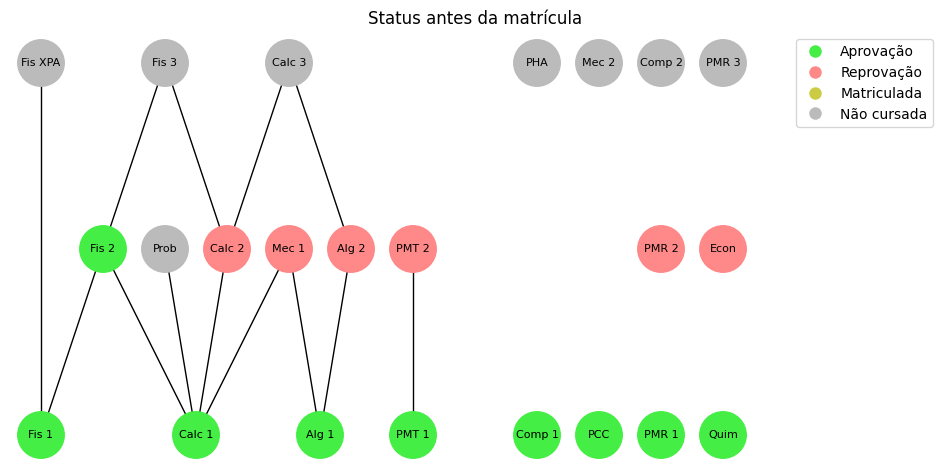

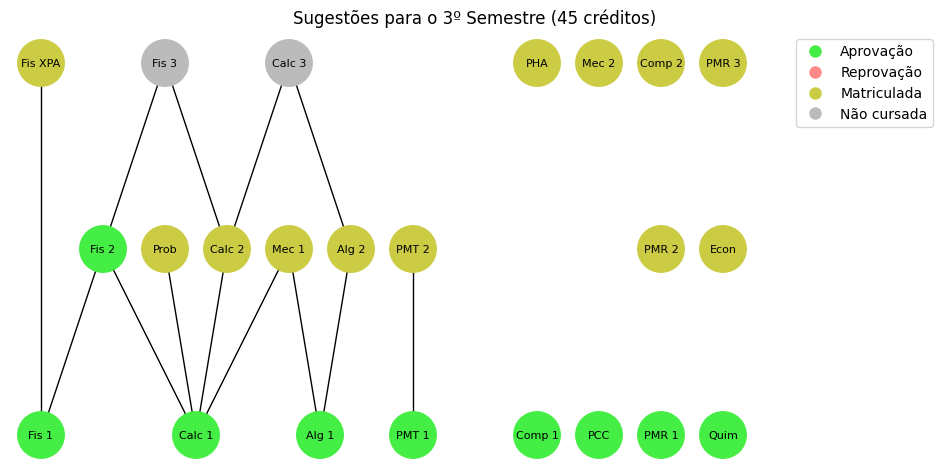

In [ ]:
completed_subjects = [1,2,3,4,5,6,7,8,9]
max_credit = 27
suggest_subjects(completed_subjects, max_credit)